<a href="https://colab.research.google.com/github/Kritika1204/EDA-Reports/blob/master/Big_Mart_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Big Mart  Sales





**Big Mart is a grocery supermarket brand, and it is widely known for its home delivery services of food and grocery. Here is an EDA report to find out the trend of sales of each product at a particular store. We will also try to look at the properties of products and stores which play a key role in increasing sales.**

##Dataset Description

The dataset has 8524 entries with 13 columns. The description of each column is given below:

**Item_Identifier** - Unique product ID

**Item_Weight** - Weight of product

**Item_Fat_Content** - Whether the product is low fat or not

**Item_Visibility** - The % of total display area of all products belongs

**Item_Type** - The category to which the product belongs

**Item_MRP** - Maximum Retail Price (list price) of the product

**Outlet_Identifier** - Unique store ID

**Outlet_Establishment_Year** - The year in which the store was established

**Outlet_Size** - The size of the store in terms of ground area covered

**Outlet_Location_Type** - The type of city in which the store is located

**Outlet_Type** - Whether the outlet is just a grocery store or some sort of supermarket

**Item_Outlet_Sales** - Sales of the product in a particular store. This is the outcome variable to be predicted.

In [0]:
import numpy as np
import pandas as pd                      #Importing the libraries

In [0]:
df = pd.read_csv("Big_mart.csv")         #Reading the file  

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.drop(['Item_Identifier','Outlet_Identifier'],axis=1).describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


We can drop columns like Item_Identifier and Outlet_Identifier as they will not make any impact while describing the data.

**Checking the dataset quality**

In [6]:
missing_data = df.isnull().sum(axis=0).reset_index()
missing_data.columns = ['column_name', 'missing_count']
missing_data = missing_data[missing_data['missing_count']>0]     #Extracting null columns
missing_data = missing_data.sort_values(by='missing_count')
missing_data

,column_name,missing_count
1,Item_Weight,1463
8,Outlet_Size,2410


Here we see that columns 'Item_Weight' and 'Outlet_Size' contains null values. So , we need to impute the missing values before moving to the further analysis. 

In [7]:
df.Outlet_Size.value_counts(dropna=False).to_frame()

,Outlet_Size
Medium,2793
NaN,2410
Small,2388
High,932


Here we see that medium stores have the highest number of count. So, it may be very much possible that the missing values be comprised of mainly high and medium outlet size.

In [8]:
df.groupby('Outlet_Location_Type').Outlet_Size.value_counts(dropna=False).to_frame()

Outlet_Size
Outlet_Location_Type Outlet_Size             
Tier 1               Small               1458
                     Medium               930
Tier 2               NaN                 1855
                     Small                930
Tier 3               Medium              1863
                     High                 932
                     NaN                  555

Here we see that Tier3 contains the maximum number of stores and Tier2 have the maximum null values. So, those null values should contain again medium and high outlet size. As, high outlet size counts 932 and they all are in Tier3. And Tier3 don't have any small oultet size, so it's null values may comprise of that.

In [9]:
df.groupby('Outlet_Type').Outlet_Size.value_counts(dropna=False).to_frame()

Outlet_Size
Outlet_Type       Outlet_Size             
Grocery Store     NaN                  555
                  Small                528
Supermarket Type1 Small               1860
                  NaN                 1855
                  High                 932
                  Medium               930
Supermarket Type2 Medium               928
Supermarket Type3 Medium               935

Here we see that most of the stores are of Supermarket Type1.It's null values may consists of more number of medium and high  sized stored.

From the above analysis we can see that most of the missing oulet size should comprise of Medium outlet size. Therefore, we can impute the null values with Medium(which is the mode too).

In [0]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

**Now, let's impute the missing data for Item_weight.**

We can impute the null values by average weight of each item type.

In [0]:
list_unique_items = df.Item_Type.unique()
mean_items = { i:df.loc[df.Item_Type==i,['Item_Weight']].mean() for i in list_unique_items}

In [0]:
for i, m in mean_items.items():
    df.loc[df['Item_Type']==i,['Item_Weight']] = df.loc[df['Item_Type']==i,['Item_Weight']].fillna(m);

In [13]:
df.isnull().sum().to_frame()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


Now, no null values in our dataset. This looks good.

##Univariate Analysis

Now let's dive straight into the univariate analysis and check the distibution of different variables.

Let's first look at Item_Weight.

In [0]:
df['Item_Weight'].describe().to_frame()

,Item_Weight
count,8523.000000
mean,12.857890
std,4.232804
min,4.555000
25%,9.310000
50%,12.867061
75%,16.000000
max,21.350000


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

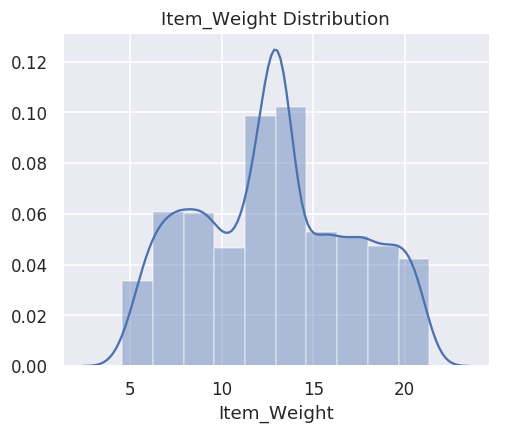

In [0]:
plt.figure(figsize=(5, 4))
sns.distplot(df['Item_Weight'].dropna(), bins = 10,rug = False, kde= True)
sns.set_style("whitegrid", {'axes.grid' : True})
plt.title('Item_Weight Distribution')
sns.despine()


From this plot we observe that number of items between 12.5 to 15 units are more.

Now, look at Item_Fat_Content

In [0]:
df['Item_Fat_Content'].describe().to_frame()

,Item_Fat_Content
count,8523
unique,5
top,Low Fat
freq,5089


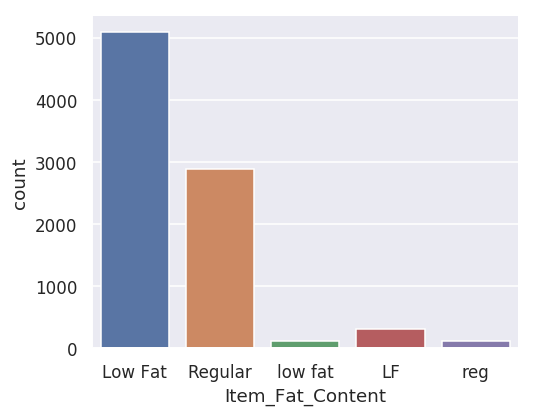

In [0]:
sns.countplot(df['Item_Fat_Content'])
sns.set_style("darkgrid", {'axes.grid' : False})
sns.despine()



Here we found anomally in our data, we have only two categories under 'Item_Fat_Content' i.e Low Fat and Regular. Some of ‘Low Fat’ values are miscoded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.Therefore, we will try to reduce them under the two categories only.

In [0]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'], 'Regular') 

Now, again let's try to look at the visulaization of updated 'Item_Fat_Content' column.

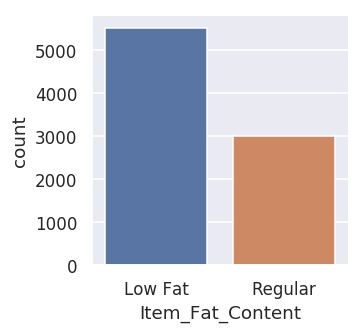

In [0]:
plt.figure(figsize=(3,3))
sns.countplot(df['Item_Fat_Content'])
sns.set_style("whitegrid", {'axes.grid' : True})
sns.despine()


From here we can see that the quantity of items which have lower values of fat content is more in the stores. This can be inferred that people tends to buy lower fat content items more.

Now, let's look at Item_Type.

In [0]:
df['Item_Type'].describe().to_frame()

,Item_Type
count,8523
unique,16
top,Fruits and Vegetables
freq,1232


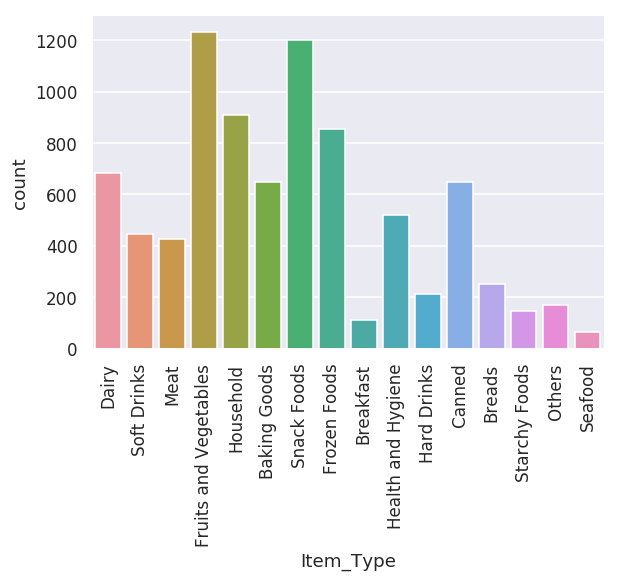

In [0]:
plt.figure(figsize=(6, 4))
sns.countplot(df['Item_Type'])
sns.set_style("whitegrid", {'axes.grid' : True})
plt.xticks(rotation=90)
sns.despine()

We can observe from the above plot that the daily use products like fruits and vegetables, snack food are higher in number as their demand may be more.

In [0]:
df['Item_MRP'].describe().to_frame()

,Item_MRP
count,8523.000000
mean,140.992782
std,62.275067
min,31.290000
25%,93.826500
50%,143.012800
75%,185.643700
max,266.888400


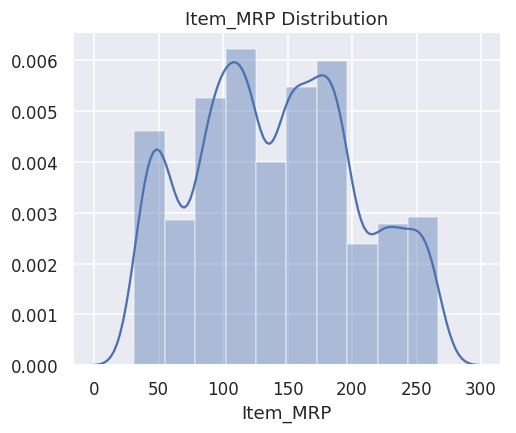

In [0]:
plt.figure(figsize=(5, 4))
sns.distplot(df['Item_MRP'].dropna(), bins = 10,rug = False, kde= True)
sns.set_style("whitegrid", {'axes.grid' : True})
plt.title('Item_MRP Distribution')
sns.despine()


Here we see the average price of the items comes under the MRP as 140 units.

Now, let's loo at the distribution of Outlet_Size.

In [0]:
df['Outlet_Size'].describe().to_frame()

,Outlet_Size
count,8523
unique,3
top,Medium
freq,5203


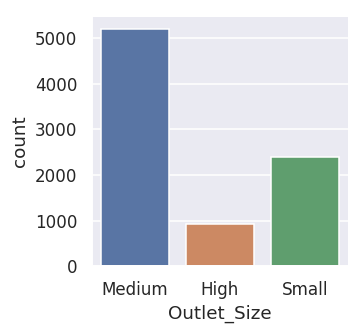

In [0]:
plt.figure(figsize=(3,3))
sns.countplot(df['Outlet_Size'])
sns.set_style("whitegrid", {'axes.grid' : True})
sns.despine()


From the above plot, we can clearly observe that most of the outlets are of medium sized.

Now, let's take a look at the outlet type.

In [0]:
df['Outlet_Type'].describe().to_frame()

,Outlet_Type
count,8523
unique,4
top,Supermarket Type1
freq,5577


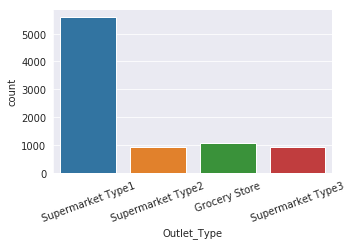

In [0]:
plt.figure(figsize=(5, 3))
sns.countplot(df['Outlet_Type'])
sns.set_style("whitegrid", {'axes.grid' : True})
plt.xticks(rotation=20)
sns.despine()

From here we can clearly say that most of the stores are of type supermarket Type1.



Now, let's look at Outlet location type.

In [0]:
df['Outlet_Location_Type'].describe().to_frame()

,Outlet_Location_Type
count,8523
unique,3
top,Tier 3
freq,3350


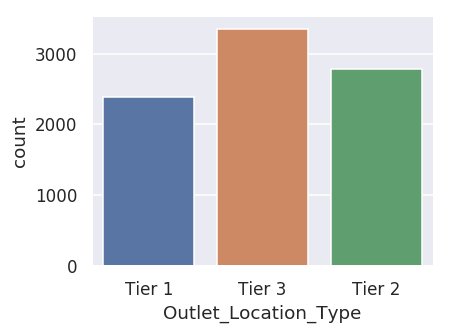

In [0]:
plt.figure(figsize=(4, 3))
sns.countplot(df['Outlet_Location_Type'])
sns.set_style("darkgrid", {'axes.grid' : False})
sns.despine()

From here we can clearly see that most of the stores are located in Tier-3 location.

Now we will look at the 'Item_Outlet_Sales'.

In [0]:
df['Item_Outlet_Sales'].describe().to_frame()

,Item_Outlet_Sales
count,8523.000000
mean,2181.288914
std,1706.499616
min,33.290000
25%,834.247400
50%,1794.331000
75%,3101.296400
max,13086.964800


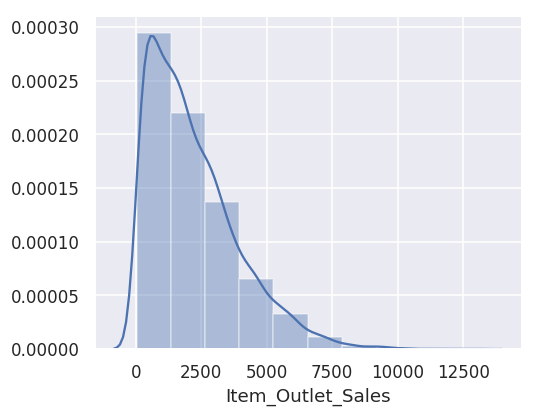

In [0]:
plt.figure(figsize=(5, 4))
sns.distplot(df[ 'Item_Outlet_Sales'].dropna(), bins = 10, kde= True)
sns.set_style("darkgrid", {'axes.grid' : False})
sns.despine()

Here we can see that maximum sales of products from a particular store is about 13,000 whereas the average sales in most of the stores is about 2,200.

##Deriving New Columns

**Determining the years of operation of a store.**

In [16]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe().to_frame()

,Outlet_Years
count,8523.000000
mean,15.168133
std,8.371760
min,4.000000
25%,9.000000
50%,14.000000
75%,26.000000
max,28.000000


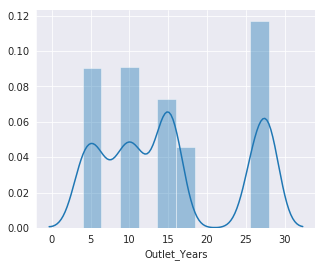

In [0]:
plt.figure(figsize=(5, 4))
sns.distplot(df[ 'Outlet_Years'].dropna(), bins = 10, kde= True)
sns.set_style("whitegrid", {'axes.grid' : True})
sns.despine()

From the above plot we can see that the oldest store is 28 years old and the newest ones are 4 years old.The number of old stores is high.

**Creating a broader category of Item_Type.**

In [0]:
#Get the first two characters of ID:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [0]:
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

In [20]:
df['Item_Type_Combined'].value_counts().to_frame()

,Item_Type_Combined
Food,6125
Non-Consumable,1599
Drinks,799


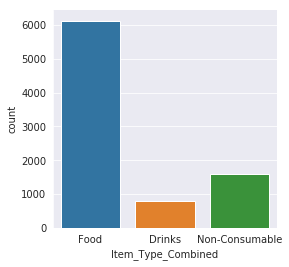

In [0]:
plt.figure(figsize=(4,4))
sns.countplot(df['Item_Type_Combined'])
sns.set_style("darkgrid", {'axes.grid' : False})
sns.despine()


Here we see that most of the items counts for freezed or dried food types.

**Deriving column for number of units sold.**

In [21]:
df['Units_Sold'] = df['Item_Outlet_Sales']/df['Item_MRP']
df[['Units_Sold','Item_Type','Outlet_Identifier']].head()

,Units_Sold,Item_Type,Outlet_Identifier
0,14.951963,Dairy,OUT049
1,9.186454,Soft Drinks,OUT018
2,14.809346,Meat,OUT049
3,4.021967,Fruits and Vegetables,OUT010
4,18.467868,Household,OUT013


In [0]:
df['Units_Sold'].describe().to_frame()

,Units_Sold
count,8523.000000
mean,15.425685
std,9.192655
min,0.952322
25%,8.949479
50%,14.926893
75%,21.092696
max,56.844890


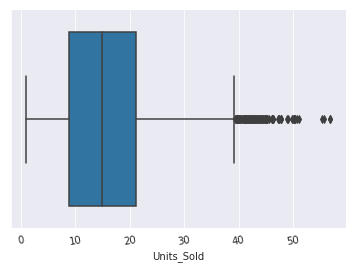

In [0]:
sns.boxplot(x="Units_Sold",  data=df)
plt.xticks(rotation = 10)
sns.set_style("whitegrid", {'axes.grid' : True})
sns.despine()

From this plot we can see that most of the units sold are between 10 to 20 for a particular product.

##Correlation Between The Variables

Before moving for the bivariate analysis part it will be more effective to look at the correlation between the different variables. It will help to figure out the various factors for the bivariate analysis part.

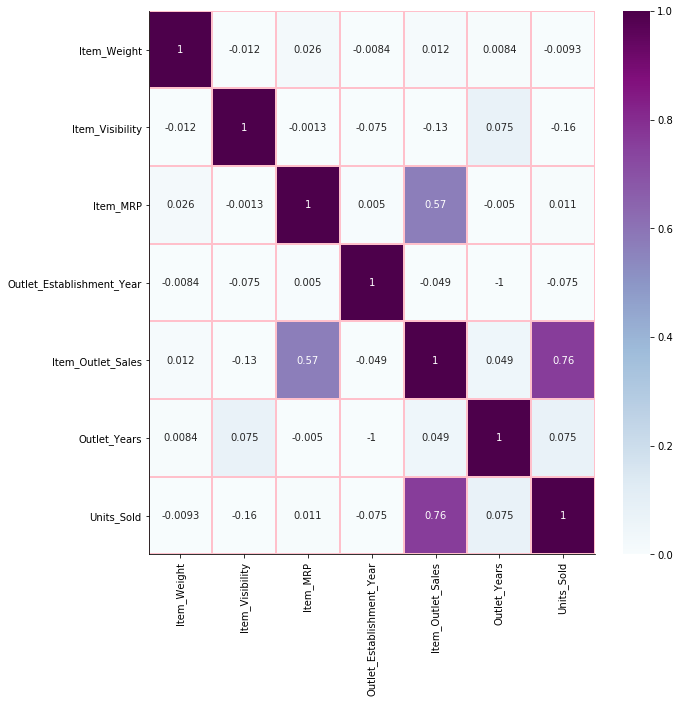

In [0]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), vmin=0, vmax=1,annot=True, cmap="BuPu", linewidth=1, linecolor ='pink')
sns.despine()

From this correlation plot we can observe the strong correlation between the 'Units_Sold' and 'Item_Outlet_Sales' and between Item_MRP' and 'Item_Outlet_Sales'.

**Now let's dive staright for the bivariate analysis.**

##Bivariate Analysis

Let's first observe the relation between 'Item_MRP' and 'Item_Outlet_Sales'.

In [0]:
df[['Item_MRP','Item_Outlet_Sales']].describe()

,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000
mean,140.992782,2181.288914
std,62.275067,1706.499616
min,31.290000,33.290000
25%,93.826500,834.247400
50%,143.012800,1794.331000
75%,185.643700,3101.296400
max,266.888400,13086.964800


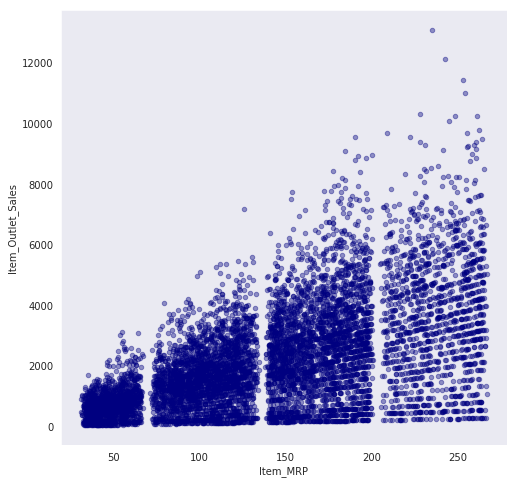

In [0]:
df.plot.scatter(x='Item_MRP',y='Item_Outlet_Sales',alpha=0.4,figsize=(8,8), color='navy')
plt.show()

From the above plot we can see that the higher the MRP, higher the sale of that product. So, we can say that the price for the most selling items is high and the stores are following good marketting techniques to increase the sales of items with high price.

Let's now look at the distribution of 'Outlet_Types' over 'Item_Outlet_Sales'.

In [0]:
df['Item_Outlet_Sales'].describe().to_frame()


,Item_Outlet_Sales
count,8523.000000
mean,2181.288914
std,1706.499616
min,33.290000
25%,834.247400
50%,1794.331000
75%,3101.296400
max,13086.964800


In [0]:
df['Outlet_Type'].describe().to_frame()

,Outlet_Type
count,8523
unique,4
top,Supermarket Type1
freq,5577


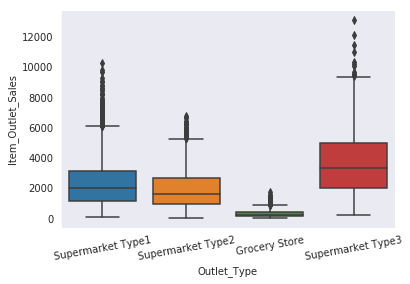

In [0]:
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", data=df)
plt.xticks(rotation = 10)
sns.despine()
              

From here we can observe that the Supermarket Type3 has the highest Item_Outlet_Sales whereas grocery stores have the lowest.

Now let's observe the relation between Item_Visibility and Item_Outlet_Sales.

In [0]:
df[['Item_Visibility','Item_Outlet_Sales']].describe()

,Item_Visibility,Item_Outlet_Sales
count,8523.000000,8523.000000
mean,0.066132,2181.288914
std,0.051598,1706.499616
min,0.000000,33.290000
25%,0.026989,834.247400
50%,0.053931,1794.331000
75%,0.094585,3101.296400
max,0.328391,13086.964800


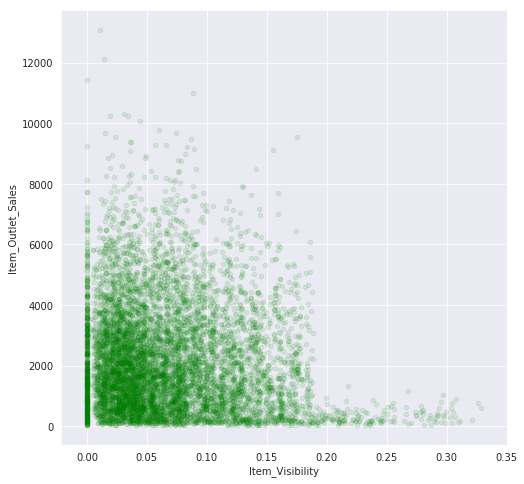

In [0]:
df.plot.scatter(x='Item_Visibility',y='Item_Outlet_Sales',alpha=0.1,figsize=(8,8), color='green')
sns.set_style("whitegrid", {'axes.grid' : True})
plt.show()

From this plot we came across an interesting fact that the less visible items have more sales. It can be inferred that the less visible items are of daily use as they are the most selling items which costumers need to buy irrespective of their visibility area.

Now, let's look at number of units sold and item outlet sales.

In [0]:
df[['Units_Sold','Item_Outlet_Sales']].describe()

,Units_Sold,Item_Outlet_Sales
count,8523.000000,8523.000000
mean,15.425685,2181.288914
std,9.192655,1706.499616
min,0.952322,33.290000
25%,8.949479,834.247400
50%,14.926893,1794.331000
75%,21.092696,3101.296400
max,56.844890,13086.964800


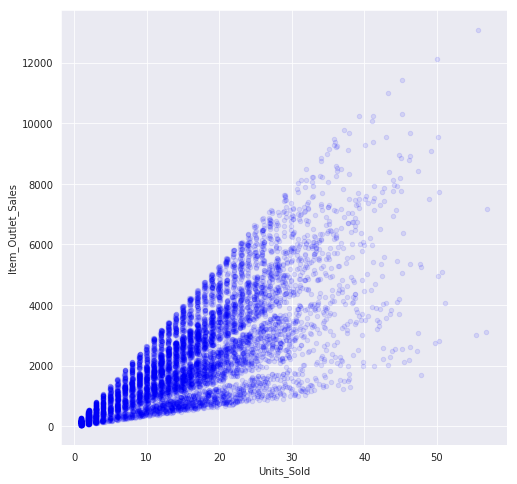

In [0]:
df.plot.scatter(x='Units_Sold',y='Item_Outlet_Sales',alpha=0.1,figsize=(8,8), color='blue')
sns.set_style("whitegrid", {'axes.grid' : True})
plt.show()

From here we observe a linear relationship between the units sold and the item outlet sales.

Now, let's look at Outlet_Years and Item_Outlet_Sales.

In [0]:
df[['Item_Outlet_Sales','Outlet_Years']].describe()

,Item_Outlet_Sales,Outlet_Years
count,8523.000000,8523.000000
mean,2181.288914,15.168133
std,1706.499616,8.371760
min,33.290000,4.000000
25%,834.247400,9.000000
50%,1794.331000,14.000000
75%,3101.296400,26.000000
max,13086.964800,28.000000


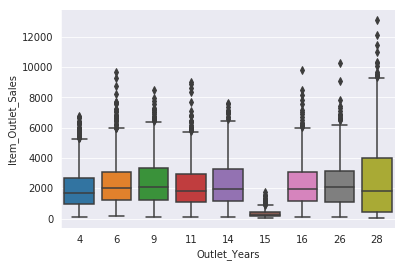

In [0]:
sns.boxplot(x="Outlet_Years", y="Item_Outlet_Sales", data=df)
sns.set_style("whitegrid", {'axes.grid' : True})
sns.despine()
            

Here, we didn't observe any significant trend all stores whether old or new have almost same sales trend except for the 15 year old store.

Now, let's look at Item_Type_Combined and Units_Sold

In [0]:
df['Item_Type_Combined'].describe().to_frame()


,Item_Type_Combined
count,8523
unique,3
top,Food
freq,6125


In [0]:
df['Units_Sold'].describe().to_frame()

,Units_Sold
count,8523.000000
mean,15.425685
std,9.192655
min,0.952322
25%,8.949479
50%,14.926893
75%,21.092696
max,56.844890


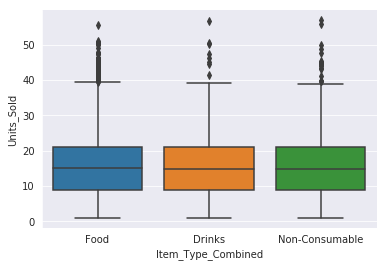

In [0]:
sns.boxplot(x="Item_Type_Combined", y="Units_Sold", data=df)
sns.set_style("whitegrid", {'axes.grid' : True})
sns.despine()
            

After grouping the item types together we see that  every combined item type contributes almost the same amount for the number of units sold.

##Multivariate Analysis

Now, let's look at the multivariate analysis.

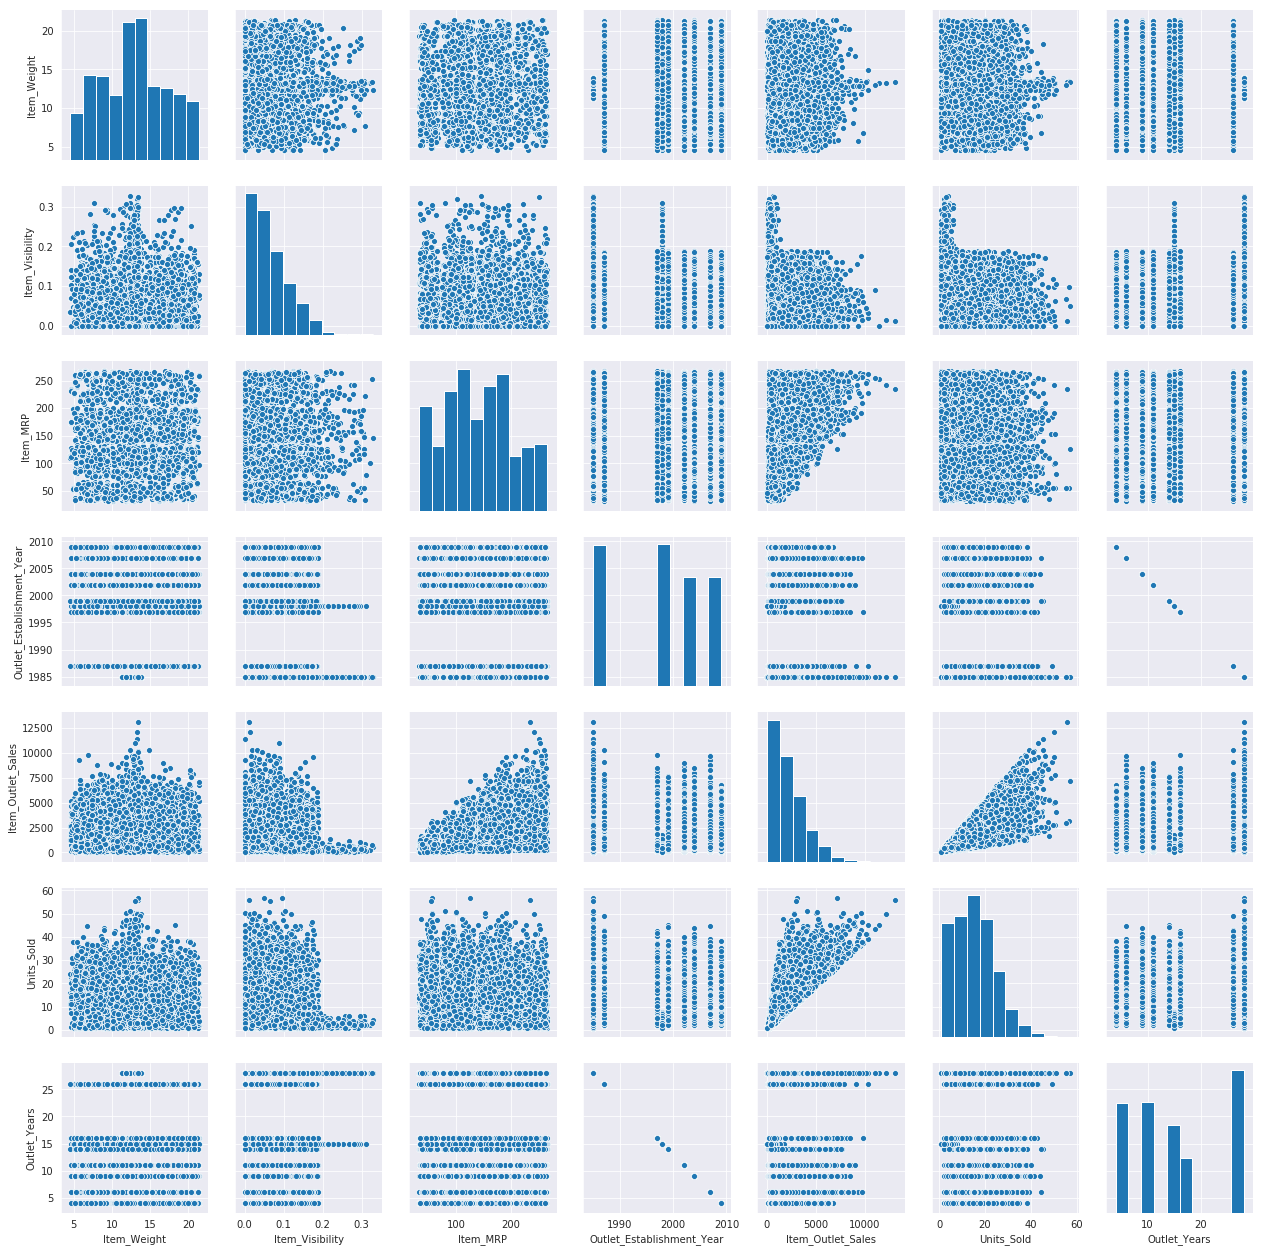

In [0]:
sns.pairplot(df)
sns.set_style("whitegrid", {'axes.grid' : True})
sns.despine()

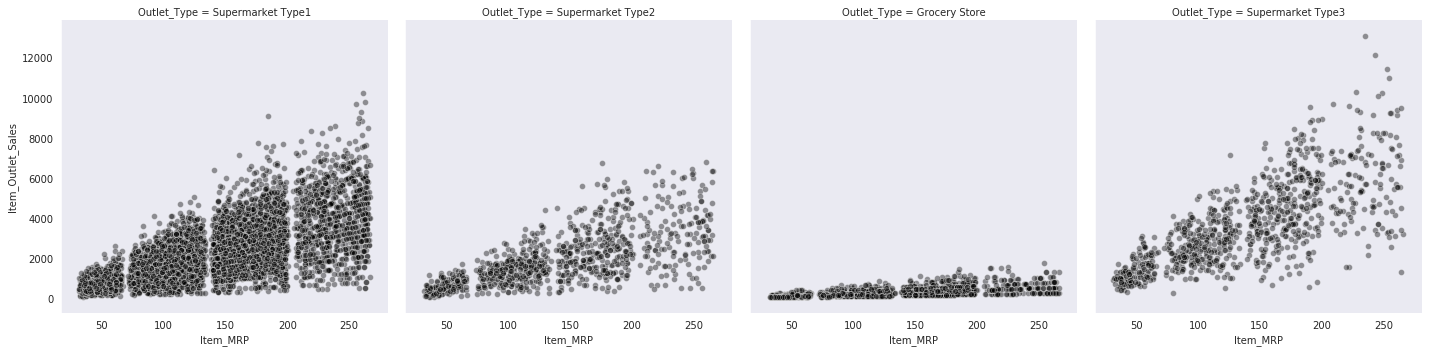

In [0]:
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", col="Outlet_Type",  data=df,alpha=0.4,color='black')
sns.set_style("whitegrid", {'axes.grid' : False})
sns.despine()

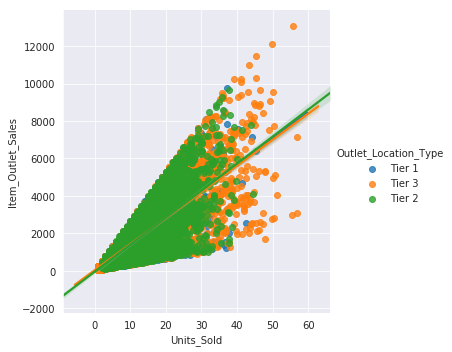

In [0]:
sns.lmplot(x="Units_Sold", y="Item_Outlet_Sales", hue="Outlet_Location_Type",  data=df)
sns.set_style("whitegrid", {'axes.grid' : True})
sns.despine()

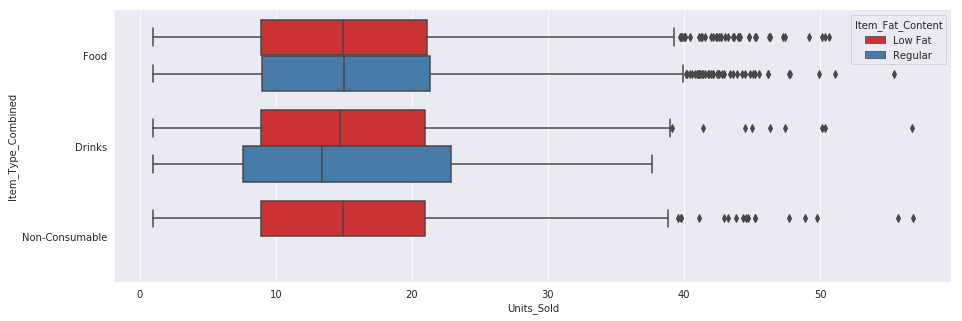

In [0]:
plt.figure(figsize = (15,5))
sns.boxplot(x='Units_Sold', y='Item_Type_Combined',hue='Item_Fat_Content', data=df,palette='Set1')
sns.set_style("darkgrid", {'axes.grid' : False})
sns.despine()

##Conclusion

Here we tried to understand the properties of products and stores which play a key role in increasing sales. We observe that most of the products which are available are of low fat content and are of type fruits and vegetables and the products with lesser visibility are sold more. We also see that most of the stores are of supermarket type and they have higher amount of item sales in comparison to grocery stores. We also came across an interesting factor that the higher MRP item are having more sales which shows the good marketting skills of supermarkets.The main plots shown  below help us to reach this conclusion.

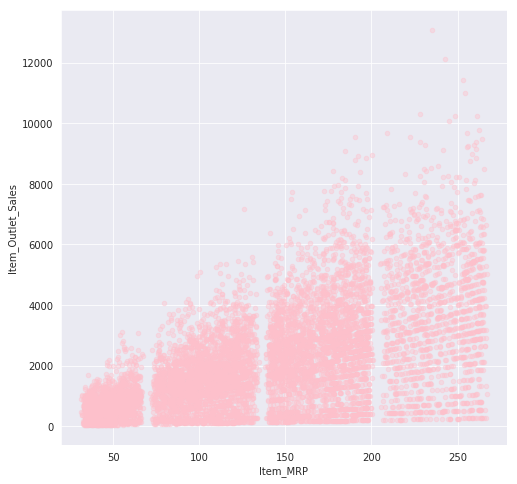

<Figure size 144x144 with 0 Axes>

In [37]:
df.plot.scatter(x='Item_MRP',y='Item_Outlet_Sales',alpha=0.4,figsize=(8,8), color='pink')
plt.figure(figsize=(2,2))
sns.set_style("whitegrid", {'axes.grid' : True})
plt.show()

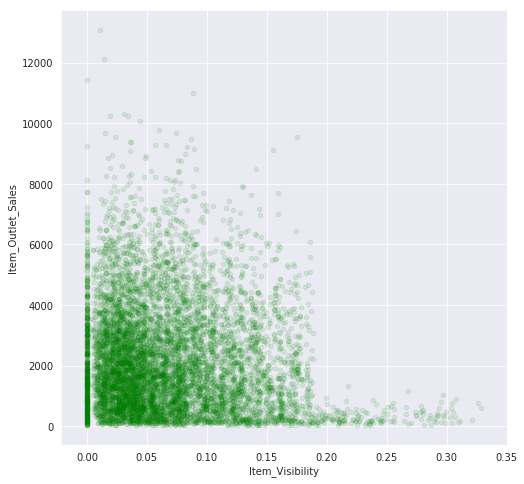

In [39]:
df.plot.scatter(x='Item_Visibility',y='Item_Outlet_Sales',alpha=0.1,figsize=(8,8), color='green')
sns.set_style("darkgrid", {'axes.grid' : False})
plt.show()
